Processing 373 images for Color Analysis...


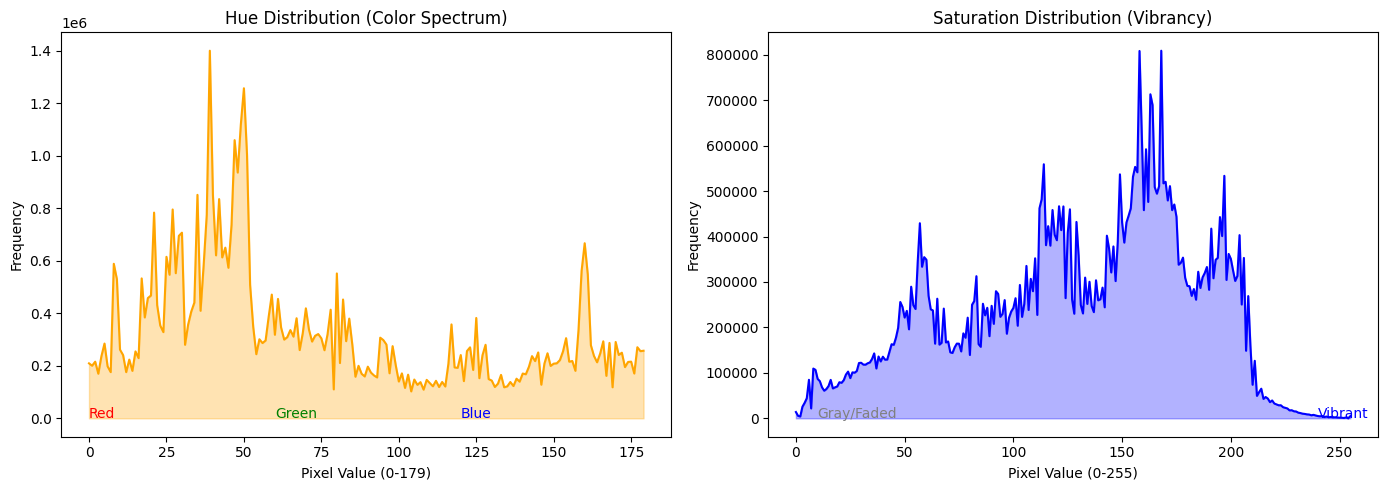

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import glob

# ================= CONFIGURATION =================
DATASET_FOLDER ="C:/Users/junha/Downloads/shape-dataset"  # <--- REPLACE THIS with your folder path
FILE_EXTENSION = "*.jpg"                # Change to *.png if needed
# =================================================


def analyze_color_distribution():
    # Get list of all images
    image_paths = glob.glob(os.path.join(DATASET_FOLDER, FILE_EXTENSION))
    
    if not image_paths:
        print("No images found! Check your path.")
        return

    # Arrays to store accumulated histograms
    hue_hist_acc = np.zeros((180, 1)) # Hue is 0-179 in OpenCV
    sat_hist_acc = np.zeros((256, 1)) # Saturation is 0-255

    print(f"Processing {len(image_paths)} images for Color Analysis...")

    for path in image_paths:
        img = cv2.imread(path)
        if img is None: continue

        # Convert BGR (OpenCV default) to HSV
        hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
        
        # Calculate Histogram for Hue (Channel 0) and Saturation (Channel 1)
        hue_hist = cv2.calcHist([hsv], [0], None, [180], [0, 180])
        sat_hist = cv2.calcHist([hsv], [1], None, [256], [0, 256])

        # Accumulate
        hue_hist_acc += hue_hist
        sat_hist_acc += sat_hist

    # Plotting
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

    # Hue Plot
    ax1.plot(hue_hist_acc, color='orange')
    ax1.set_title('Hue Distribution (Color Spectrum)')
    ax1.set_xlabel('Pixel Value (0-179)')
    ax1.set_ylabel('Frequency')
    ax1.fill_between(range(180), hue_hist_acc.flatten(), color='orange', alpha=0.3)
    ax1.text(0, 0, "Red", color='red')
    ax1.text(60, 0, "Green", color='green')
    ax1.text(120, 0, "Blue", color='blue')

    # Saturation Plot
    ax2.plot(sat_hist_acc, color='blue')
    ax2.set_title('Saturation Distribution (Vibrancy)')
    ax2.set_xlabel('Pixel Value (0-255)')
    ax2.set_ylabel('Frequency')
    ax2.fill_between(range(256), sat_hist_acc.flatten(), color='blue', alpha=0.3)
    ax2.text(10, 0, "Gray/Faded", color='gray')
    ax2.text(240, 0, "Vibrant", color='blue')

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    analyze_color_distribution()

Processing 373 images for Brightness/Contrast...


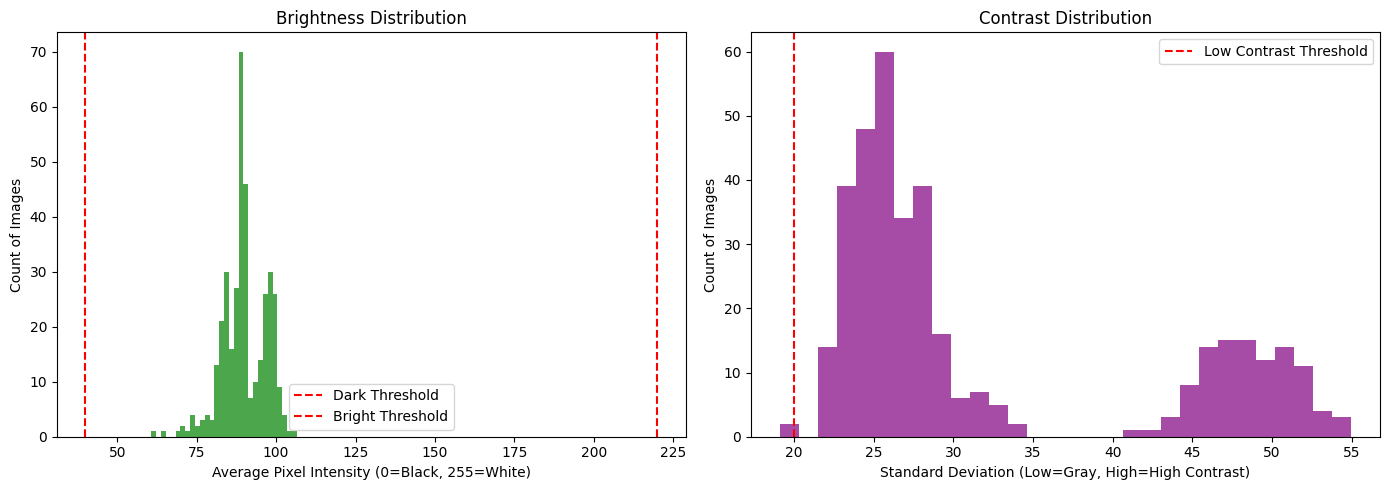


--- POTENTIAL ISSUES FOUND ---
Image: image82.jpg | Issue: Low Contrast (Washed Out) | Value: 19.10


In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import glob

# ================= CONFIGURATION =================
DATASET_FOLDER = "C:/Users/junha/Downloads/shape-dataset"  # <--- REPLACE THIS
FILE_EXTENSION = "*.jpg"
# =================================================

def analyze_brightness_contrast():
    image_paths = glob.glob(os.path.join(DATASET_FOLDER, FILE_EXTENSION))
    
    if not image_paths:
        print("No images found!")
        return

    brightness_values = []
    contrast_values = []
    problematic_images = []

    print(f"Processing {len(image_paths)} images for Brightness/Contrast...")

    for path in image_paths:
        img = cv2.imread(path)
        if img is None: continue

        # Convert to Grayscale for simple intensity calculation
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Calculate Metrics
        mean_brightness = np.mean(gray)
        std_contrast = np.std(gray)

        brightness_values.append(mean_brightness)
        contrast_values.append(std_contrast)

        # Flag outliers (Adjust these thresholds based on your needs)
        filename = os.path.basename(path)
        if mean_brightness < 40:
            problematic_images.append((filename, "Too Dark", mean_brightness))
        elif mean_brightness > 220:
            problematic_images.append((filename, "Too Bright", mean_brightness))
        elif std_contrast < 20:
            problematic_images.append((filename, "Low Contrast (Washed Out)", std_contrast))

    # Plotting
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

    # Brightness
    ax1.hist(brightness_values, bins=30, color='green', alpha=0.7)
    ax1.set_title('Brightness Distribution')
    ax1.set_xlabel('Average Pixel Intensity (0=Black, 255=White)')
    ax1.set_ylabel('Count of Images')
    ax1.axvline(x=40, color='r', linestyle='--', label='Dark Threshold')
    ax1.axvline(x=220, color='r', linestyle='--', label='Bright Threshold')
    ax1.legend()

    # Contrast
    ax2.hist(contrast_values, bins=30, color='purple', alpha=0.7)
    ax2.set_title('Contrast Distribution')
    ax2.set_xlabel('Standard Deviation (Low=Gray, High=High Contrast)')
    ax2.set_ylabel('Count of Images')
    ax2.axvline(x=20, color='r', linestyle='--', label='Low Contrast Threshold')
    ax2.legend()

    plt.tight_layout()
    plt.show()

    # Report Outliers
    if problematic_images:
        print("\n--- POTENTIAL ISSUES FOUND ---")
        for name, issue, val in problematic_images[:10]: # Print top 10
            print(f"Image: {name} | Issue: {issue} | Value: {val:.2f}")
    else:
        print("\nNo extreme outliers found.")

if __name__ == "__main__":
    analyze_brightness_contrast()

Processing 373 images for Blur Detection...


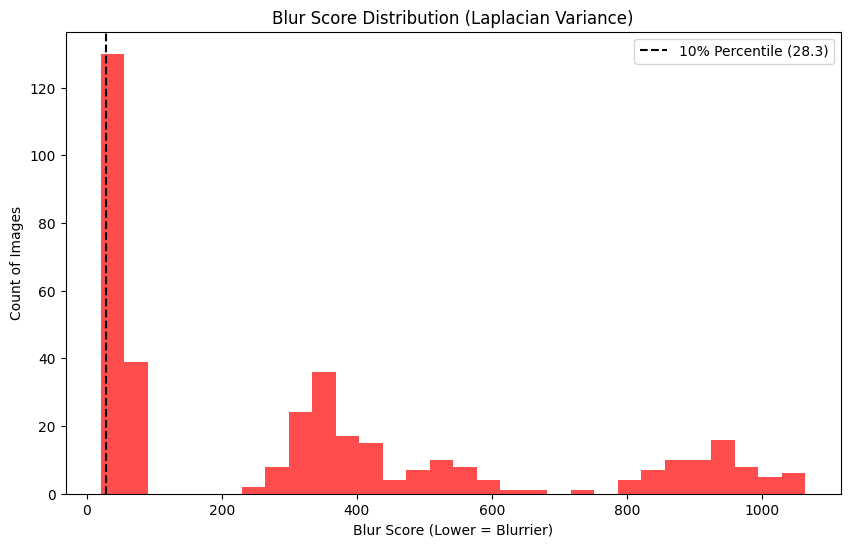


--- TOP 5 BLURRIEST IMAGES (Check these!) ---
Image: shape76.jpg | Score: 21.11
Image: shape11.jpg | Score: 21.53
Image: shape29.jpg | Score: 21.73
Image: shape36.jpg | Score: 21.74
Image: shape103.jpg | Score: 21.87

Recommended Action: Inspect images with score below 28.3


In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import glob

# ================= CONFIGURATION =================
DATASET_FOLDER = "C:/Users/junha/Downloads/shape-dataset"  # <--- REPLACE THIS
FILE_EXTENSION = "*.jpg"
# =================================================

def variance_of_laplacian(image):
    # Compute the Laplacian of the image and then return the variance
    return cv2.Laplacian(image, cv2.CV_64F).var()

def analyze_blur():
    image_paths = glob.glob(os.path.join(DATASET_FOLDER, FILE_EXTENSION))
    
    if not image_paths:
        print("No images found!")
        return

    blur_scores = []
    blurriest_images = []

    print(f"Processing {len(image_paths)} images for Blur Detection...")

    for path in image_paths:
        img = cv2.imread(path)
        if img is None: continue

        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        
        # Calculate Blur Score
        score = variance_of_laplacian(gray)
        blur_scores.append(score)
        
        # Store for sorting later
        blurriest_images.append((score, os.path.basename(path)))

    # Sort images by blur score (lowest score = most blurry)
    blurriest_images.sort(key=lambda x: x[0])

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.hist(blur_scores, bins=30, color='red', alpha=0.7)
    plt.title('Blur Score Distribution (Laplacian Variance)')
    plt.xlabel('Blur Score (Lower = Blurrier)')
    plt.ylabel('Count of Images')
    
    # Calculate a dynamic threshold (e.g., lower 10% percentile)
    threshold = np.percentile(blur_scores, 10)
    plt.axvline(x=threshold, color='black', linestyle='--', label=f'10% Percentile ({threshold:.1f})')
    plt.legend()
    plt.show()

    # Report the worst offenders
    print("\n--- TOP 5 BLURRIEST IMAGES (Check these!) ---")
    for score, name in blurriest_images[:5]:
        print(f"Image: {name} | Score: {score:.2f}")

    print(f"\nRecommended Action: Inspect images with score below {threshold:.1f}")

if __name__ == "__main__":
    analyze_blur()

Scanning 370 label files...


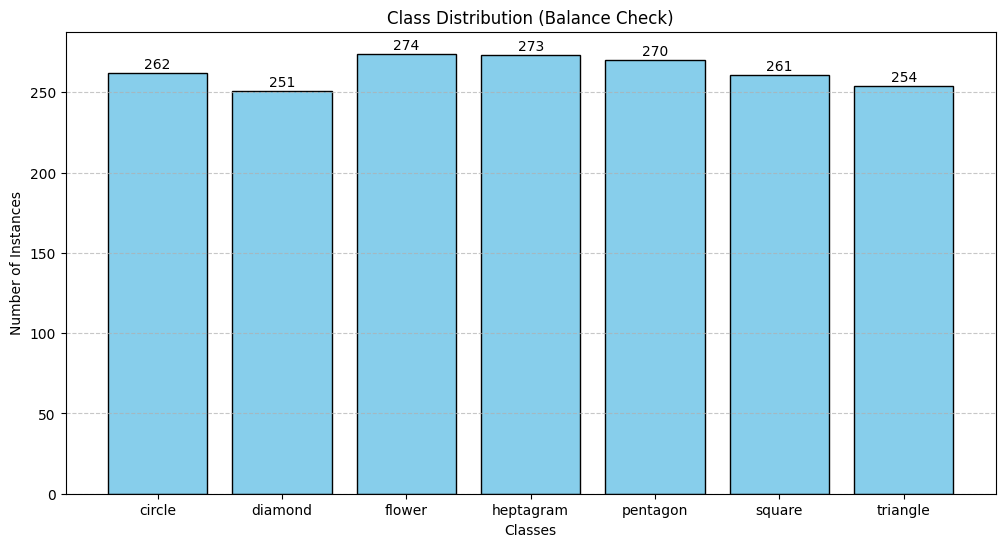

In [22]:
import matplotlib.pyplot as plt
import os
import glob
from collections import Counter

# ================= CONFIGURATION =================
LABEL_FOLDER = "C:\\Users\\junha\\Downloads\\unpaired shape.v13-general-shape.yolov8\\all_labels"  # <--- FOLDER WITH .TXT FILES
# Update this list to match your classes.txt or data.yaml order
CLASS_NAMES = ['circle', 'diamond', 'flower', 'heptagram', 'pentagon', 'square', 'triangle']
# =================================================

def plot_class_distribution():
    label_files = glob.glob(os.path.join(LABEL_FOLDER, "*.txt"))
    
    if not label_files:
        print("No label files found! Check your path.")
        return

    class_counts = Counter()

    print(f"Scanning {len(label_files)} label files...")

    for file in label_files:
        with open(file, 'r') as f:
            lines = f.readlines()
            for line in lines:
                parts = line.strip().split()
                if len(parts) > 0:
                    class_id = int(parts[0])
                    class_counts[class_id] += 1

    # Prepare data for plotting
    # Ensure all classes are represented even if count is 0
    counts = [class_counts.get(i, 0) for i in range(len(CLASS_NAMES))]
    
    # Plotting
    plt.figure(figsize=(12, 6))
    bars = plt.bar(CLASS_NAMES, counts, color='skyblue', edgecolor='black')
    
    # Add numbers on top of bars
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 1, int(yval), ha='center', va='bottom')

    plt.title('Class Distribution (Balance Check)')
    plt.xlabel('Classes')
    plt.ylabel('Number of Instances')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

if __name__ == "__main__":
    plot_class_distribution()

Scanning 390 label files...

Class Name      | Count  | Mean W   | Mean H   | Aspect Ratio (W/H)   | Consistency (Std)
-----------------------------------------------------------------------------------------------
circle          | 279    | 0.176    | 0.258    | 0.683                | 0.022          
diamond         | 269    | 0.160    | 0.236    | 0.701                | 0.196          
flower          | 284    | 0.188    | 0.275    | 0.683                | 0.032          
heptagram       | 284    | 0.187    | 0.272    | 0.687                | 0.018          
pentagon        | 285    | 0.182    | 0.266    | 0.684                | 0.024          
square          | 278    | 0.184    | 0.271    | 0.681                | 0.018          
triangle        | 269    | 0.197    | 0.289    | 0.683                | 0.052          



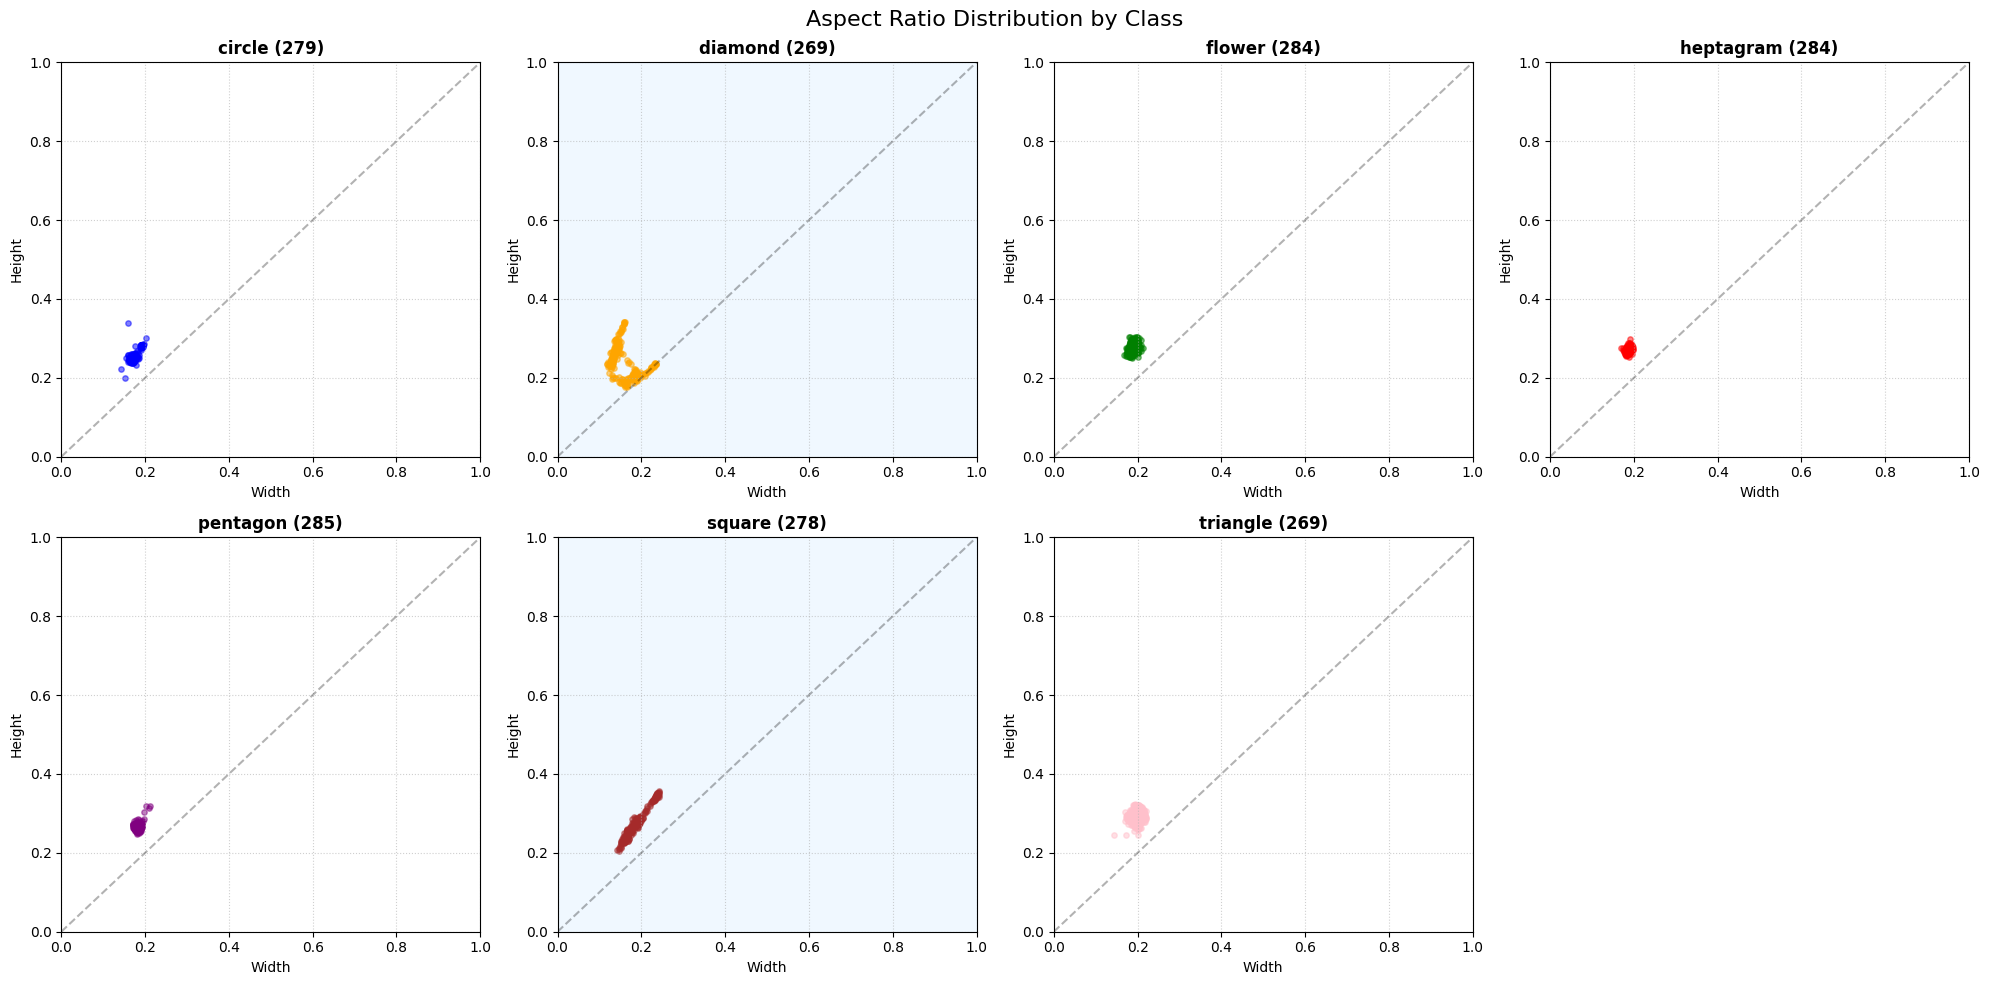

In [30]:
import matplotlib.pyplot as plt
import os
import glob
import math
import numpy as np  # Added for statistical calculations

# ================= CONFIGURATION =================
LABEL_FOLDER = "C:\\Users\\junha\\Downloads\\unpaired shape.v17-390-shape.yolov8\\all_labels"  # <--- REPLACE THIS
# Ensure this matches your classes.txt exactly
CLASS_NAMES =  ['circle', 'diamond', 'flower', 'heptagram', 'pentagon', 'square', 'triangle']
# =================================================

def plot_aspect_ratio_separate():
    label_files = glob.glob(os.path.join(LABEL_FOLDER, "*.txt"))
    
    if not label_files:
        print("No label files found! Check your path.")
        return

    # Store (width, height) for each class
    class_data = {name: [] for name in CLASS_NAMES}

    print(f"Scanning {len(label_files)} label files...")

    for file in label_files:
        with open(file, 'r') as f:
            lines = f.readlines()
            for line in lines:
                parts = line.strip().split()
                if len(parts) >= 5:
                    try:
                        class_id = int(parts[0])
                        # YOLO format: class x y w h
                        w = float(parts[3])
                        h = float(parts[4])
                        
                        if 0 <= class_id < len(CLASS_NAMES):
                            class_data[CLASS_NAMES[class_id]].append((w, h))
                    except ValueError:
                        continue

    # Determine grid size (e.g., for 7 classes, we need 2 rows x 4 cols = 8 slots)
    num_classes = len(CLASS_NAMES)
    cols = 4
    rows = math.ceil(num_classes / cols)

    fig, axes = plt.subplots(rows, cols, figsize=(20, 10))
    axes = axes.flatten()  # Flatten to easy 1D array access

    # Define colors for distinction (optional)
    colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray']

    for i, class_name in enumerate(CLASS_NAMES):
        ax = axes[i]
        points = class_data[class_name]
        
        # Plot the dots
        if points:
            ws, hs = zip(*points)
            ax.scatter(ws, hs, alpha=0.5, color=colors[i % len(colors)], s=15)
        
        # Add the 1:1 Square Line (Reference)
        ax.plot([0, 1], [0, 1], 'k--', alpha=0.3, label="1:1 Ratio")
        
        # Formatting
        ax.set_title(f"{class_name} ({len(points)})", fontsize=12, fontweight='bold')
        ax.set_xlim(0, 1)
        ax.set_ylim(0, 1)
        ax.set_xlabel('Width')
        ax.set_ylabel('Height')
        ax.grid(True, linestyle=':', alpha=0.6)
        
        # Highlight the "Square vs Diamond" Check
        if class_name in ["square", "diamond"]:
            ax.set_facecolor('#f0f8ff') # Light blue background for attention

    # Hide empty subplots if any
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.suptitle('Aspect Ratio Distribution by Class', fontsize=16)
    plt.tight_layout()

    # ================= NEW: DATA TABLE GENERATION =================
    print("\n" + "="*95)
    print(f"{'Class Name':<15} | {'Count':<6} | {'Mean W':<8} | {'Mean H':<8} | {'Aspect Ratio (W/H)':<20} | {'Consistency (Std)':<15}")
    print("-" * 95)

    for name in CLASS_NAMES:
        points = class_data[name]
        if not points:
            print(f"{name:<15} | {'0':<6} | {'-':<8} | {'-':<8} | {'-':<20} | {'-':<15}")
            continue
        
        # Convert to numpy array for fast math
        pts_array = np.array(points)
        ws = pts_array[:, 0]
        hs = pts_array[:, 1]
        
        # Calculate Ratios (Width / Height)
        # Ratio = 1.0 means perfect square
        # Ratio > 1.0 means wide (Landscape)
        # Ratio < 1.0 means tall (Portrait)
        ratios = ws / hs 
        
        count = len(points)
        mean_w = np.mean(ws)
        mean_h = np.mean(hs)
        mean_ratio = np.mean(ratios)
        std_ratio = np.std(ratios) # Low std dev = Very consistent shape
        
        print(f"{name:<15} | {count:<6} | {mean_w:<8.3f} | {mean_h:<8.3f} | {mean_ratio:<20.3f} | {std_ratio:<15.3f}")
    
    print("="*95 + "\n")
    # ==============================================================

    plt.show()

if __name__ == "__main__":
    plot_aspect_ratio_separate()

File with exactly 4 objects: generated_fixed_shapes_90px_11_png.rf.15b72d434a1443d84e9151bebcb933a5.txt
File with exactly 4 objects: generated_fixed_shapes_90px_82_png.rf.2963f145a1771bc3114687bca09e93c2.txt


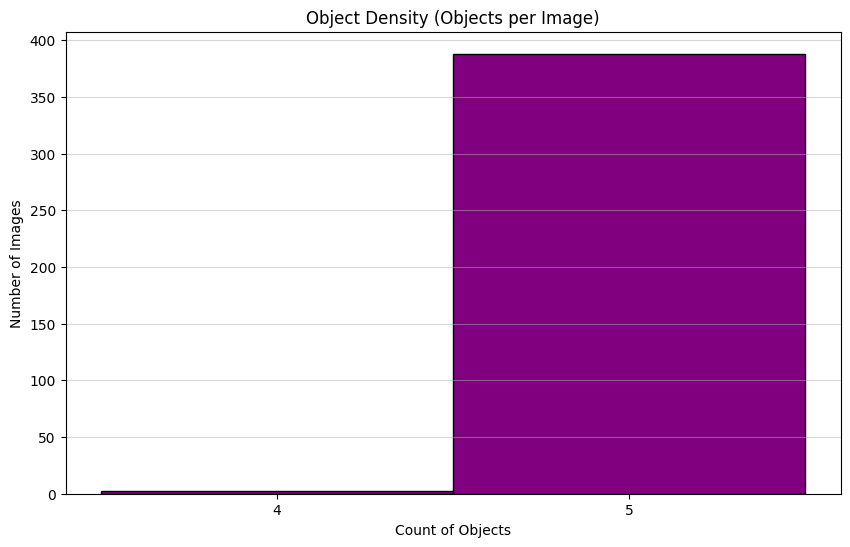

Average objects per image: 4.99


In [17]:
import matplotlib.pyplot as plt
import os
import glob

# ================= CONFIGURATION =================
LABEL_FOLDER = "C:\\Users\\junha\\Downloads\\unpaired shape.v17-390-shape.yolov8\\all_labels"
# =================================================

def plot_objects_per_image():
    label_files = glob.glob(os.path.join(LABEL_FOLDER, "*.txt"))
    
    counts = []
    empty_files = []

    for file in label_files:
        with open(file, 'r') as f:
            # Count non-empty lines
            lines = [line.strip() for line in f.readlines() if line.strip()]
            count = len(lines)
            counts.append(count)
            
            if count == 0:
                empty_files.append(os.path.basename(file))
            
            if count == 4:
                print(f"File with exactly 4 objects: {os.path.basename(file)}")

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.hist(counts, bins=range(min(counts), max(counts) + 2), align='left', color='purple', edgecolor='black')
    
    plt.title('Object Density (Objects per Image)')
    plt.xlabel('Count of Objects')
    plt.ylabel('Number of Images')
    plt.xticks(range(min(counts), max(counts) + 1))
    plt.grid(axis='y', alpha=0.5)
    plt.show()

    print(f"Average objects per image: {sum(counts)/len(counts):.2f}")
    if empty_files:
        print(f"Warning: Found {len(empty_files)} empty label files (Background images).")

if __name__ == "__main__":
    plot_objects_per_image()